In [26]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

################################################################################
#
#    PLOTTING OPTIONS
#
################################################################################


# PLOTTING OPTIONS
fig_width_pt = 3*246.0  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inch
golden_mean = (np.sqrt(5)-1.0)/2.0         # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = fig_width*golden_mean      # height in inches
fig_size =  [fig_width,fig_height]

params = { 'axes.labelsize': 24,
          'font.family': 'serif',
          'font.serif': 'Computer Modern Raman',
          'font.size': 24,
          'legend.fontsize': 20,
          'xtick.labelsize': 24,
          'ytick.labelsize': 24,
          'axes.grid' : True,
          'text.usetex': True,
          'savefig.dpi' : 100,
          'lines.markersize' : 14,
          'figure.figsize': fig_size}

mpl.rcParams.update(params)

In [27]:
from pycbc import frame

In [28]:
data = frame.read_frame('./L-L1_GWOSC_16KHZ_R1-1246046357-4096.gwf','L1:GWOSC-16KHZ_R1_STRAIN')

In [80]:
merger_time = 1246048404.6 

[]

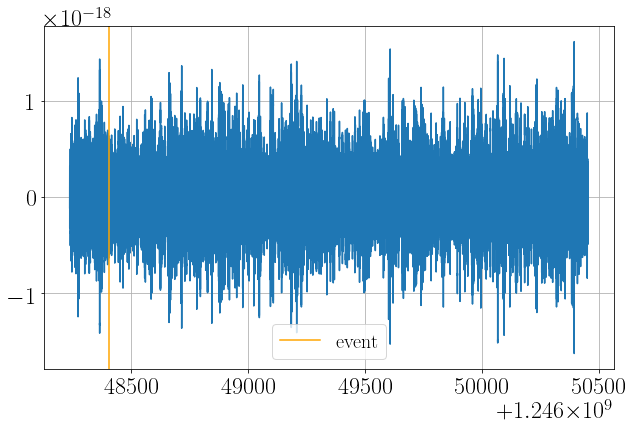

In [82]:
plt.plot(data.sample_times,data)
plt.axvline(x=merger_time,color='orange',label='event')
plt.legend()

In [83]:
data.data

array([            nan,             nan,             nan, ...,
       -4.71031651e-19, -4.56739260e-19, -4.90146986e-19])

In [84]:
offset = int(np.where(np.isnan(data.data))[0][-1] /16384)

In [85]:
offset

1878

In [86]:
index = np.where(np.isnan(data.data))[0][-1]

In [87]:
index

30785535

In [88]:
data.sample_times[index]

1246048235.999939

In [89]:
data.sample_times[index+1]

1246048236.0

In [90]:
data.data[index]

nan

In [91]:
data.data[index+1]

-1.13287020808589e-19

In [93]:
#newdata = data.time_slice(data.sample_times[index+1],data.sample_times.data[-1])
newdata = data.time_slice(merger_time-50,merger_time+462)

In [94]:
newdata.data

array([-1.33967246e-19, -1.29222842e-19, -1.05657700e-19, ...,
       -9.83093680e-20, -8.04667124e-20, -7.40712839e-20])

/opt/local/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


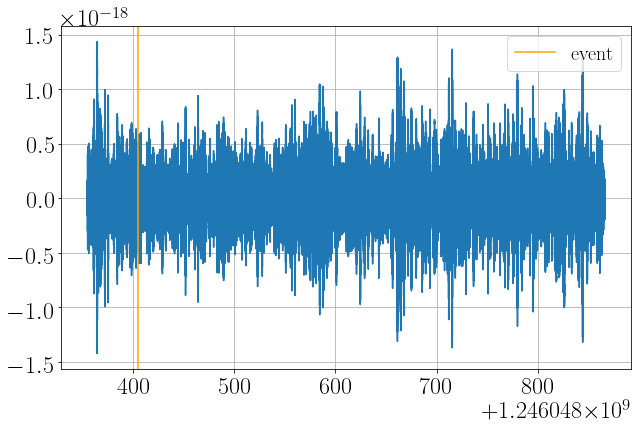

In [95]:
plt.plot(newdata.sample_times,newdata)
plt.axvline(x=merger_time,color='orange',label='event')
plt.legend()

In [96]:
whitened = newdata.whiten(4,4)

In [97]:
whitened.data

array([ 104.97075982,  156.45193765,   31.11882603, ...,   58.13882633,
       -106.54687736,  -33.21367561])

/opt/local/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


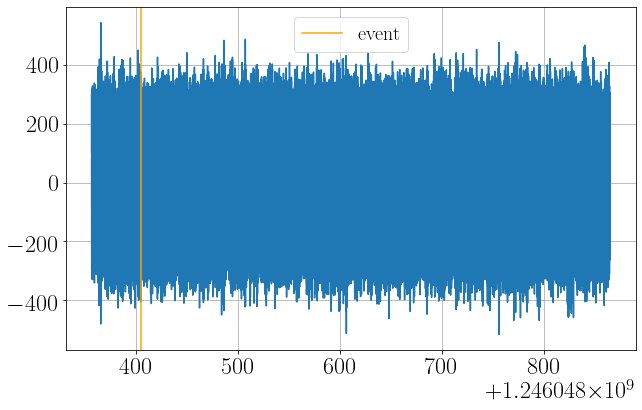

In [98]:
plt.plot(whitened.sample_times,whitened)
plt.axvline(x=merger_time,label='event',color='orange')
plt.legend()

(1246048403.6, 1246048405.6)

/opt/local/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


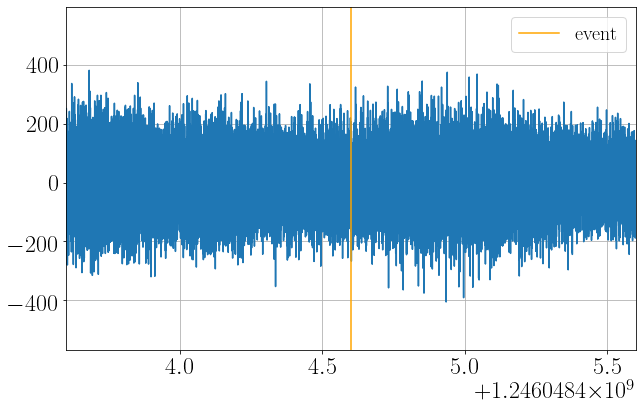

In [99]:
plt.plot(whitened.sample_times,whitened)
plt.axvline(x=merger_time,label='event',color='orange')
plt.legend()
plt.xlim(merger_time-1,merger_time+1)

# PSD

In [100]:
psd = newdata.psd(4)

(10, 1024)

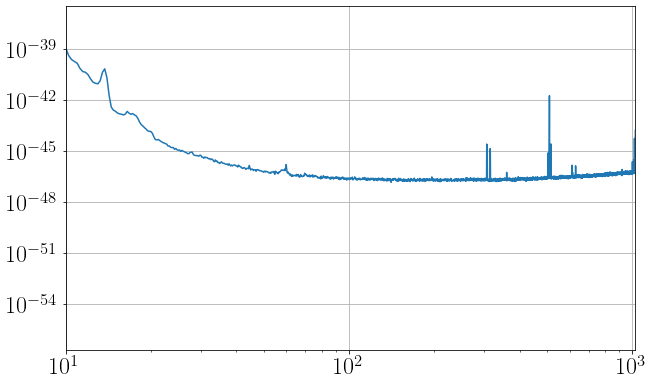

In [101]:
plt.plot(psd.sample_frequencies,psd)
plt.xscale('log')
plt.yscale('log')
plt.xlim(10,1024)

In [103]:
final=whitened.highpass_fir(15,512).lowpass_fir(300,512)

/opt/local/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


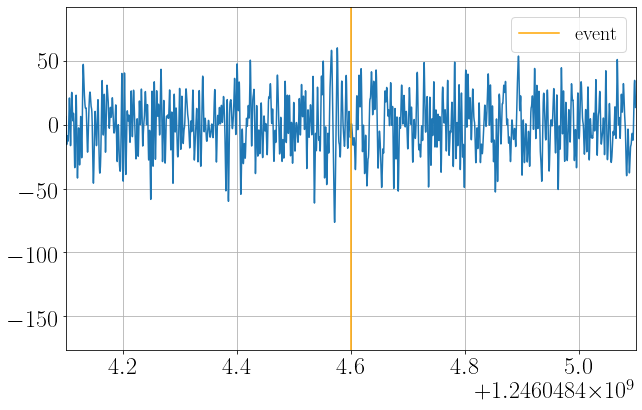

In [104]:
plt.plot(final.sample_times,final)
plt.xlim(merger_time-0.5,merger_time+0.5)
plt.axvline(x=merger_time,color='orange',label='event')
plt.legend()

In [113]:
zoom = whitened.time_slice(merger_time-1,merger_time+1)

In [114]:
times, freqs, power = zoom.qtransform(.001, logfsteps=100,
                                                qrange=(8, 8),
                                                frange=(20, 512),
                                         )

(20, 512)

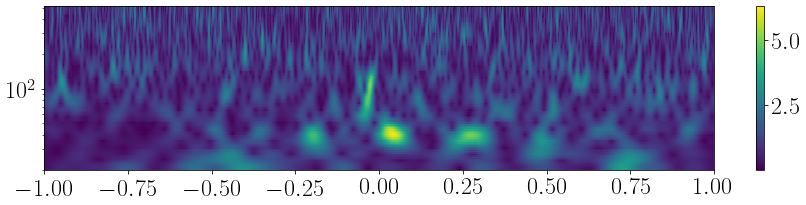

In [115]:
plt.figure(figsize=[15, 3])
plt.pcolormesh(times-merger_time, freqs, power**0.5)
plt.colorbar()
plt.xlim(-1,1)
plt.yscale('log')
plt.ylim(20,512)